In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from pandas.plotting import scatter_matrix
import math

# Get the Data

In [79]:
maneuvers = pd.read_csv("maneuvers_cntrl.csv")
#maneuvers.head()

In [80]:
maneuvers.describe()

,x,y,z,dx,dy,dz,dv_st
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,-0.991665,-9.441984e-07,0.000896,-8.549528e-07,0.009933,-0.000001,0.000003
std,0.000029,2.901434e-05,0.000029,2.874673e-05,0.000029,0.000029,0.000111
min,-0.991715,-4.988431e-05,0.000849,-4.996027e-05,0.009881,-0.000050,-0.000241
25%,-0.991691,-2.667437e-05,0.000872,-2.697056e-05,0.009908,-0.000025,-0.000092
50%,-0.991667,-1.891950e-06,0.000896,-1.530075e-06,0.009935,-0.000003,0.000002
75%,-0.991640,2.362002e-05,0.000921,2.439902e-05,0.009958,0.000023,0.000092
max,-0.991615,4.999425e-05,0.000948,4.994496e-05,0.009981,0.000050,0.000247


Notice that dv_vel varies in the range -2e-7 to 1e-7, while dv_st varies in the range -7e-9 to 4e-9, so the MOST COSTLY maneuvers are much larger using CORRECTION_VEL method than using CORRECTION_ST !!

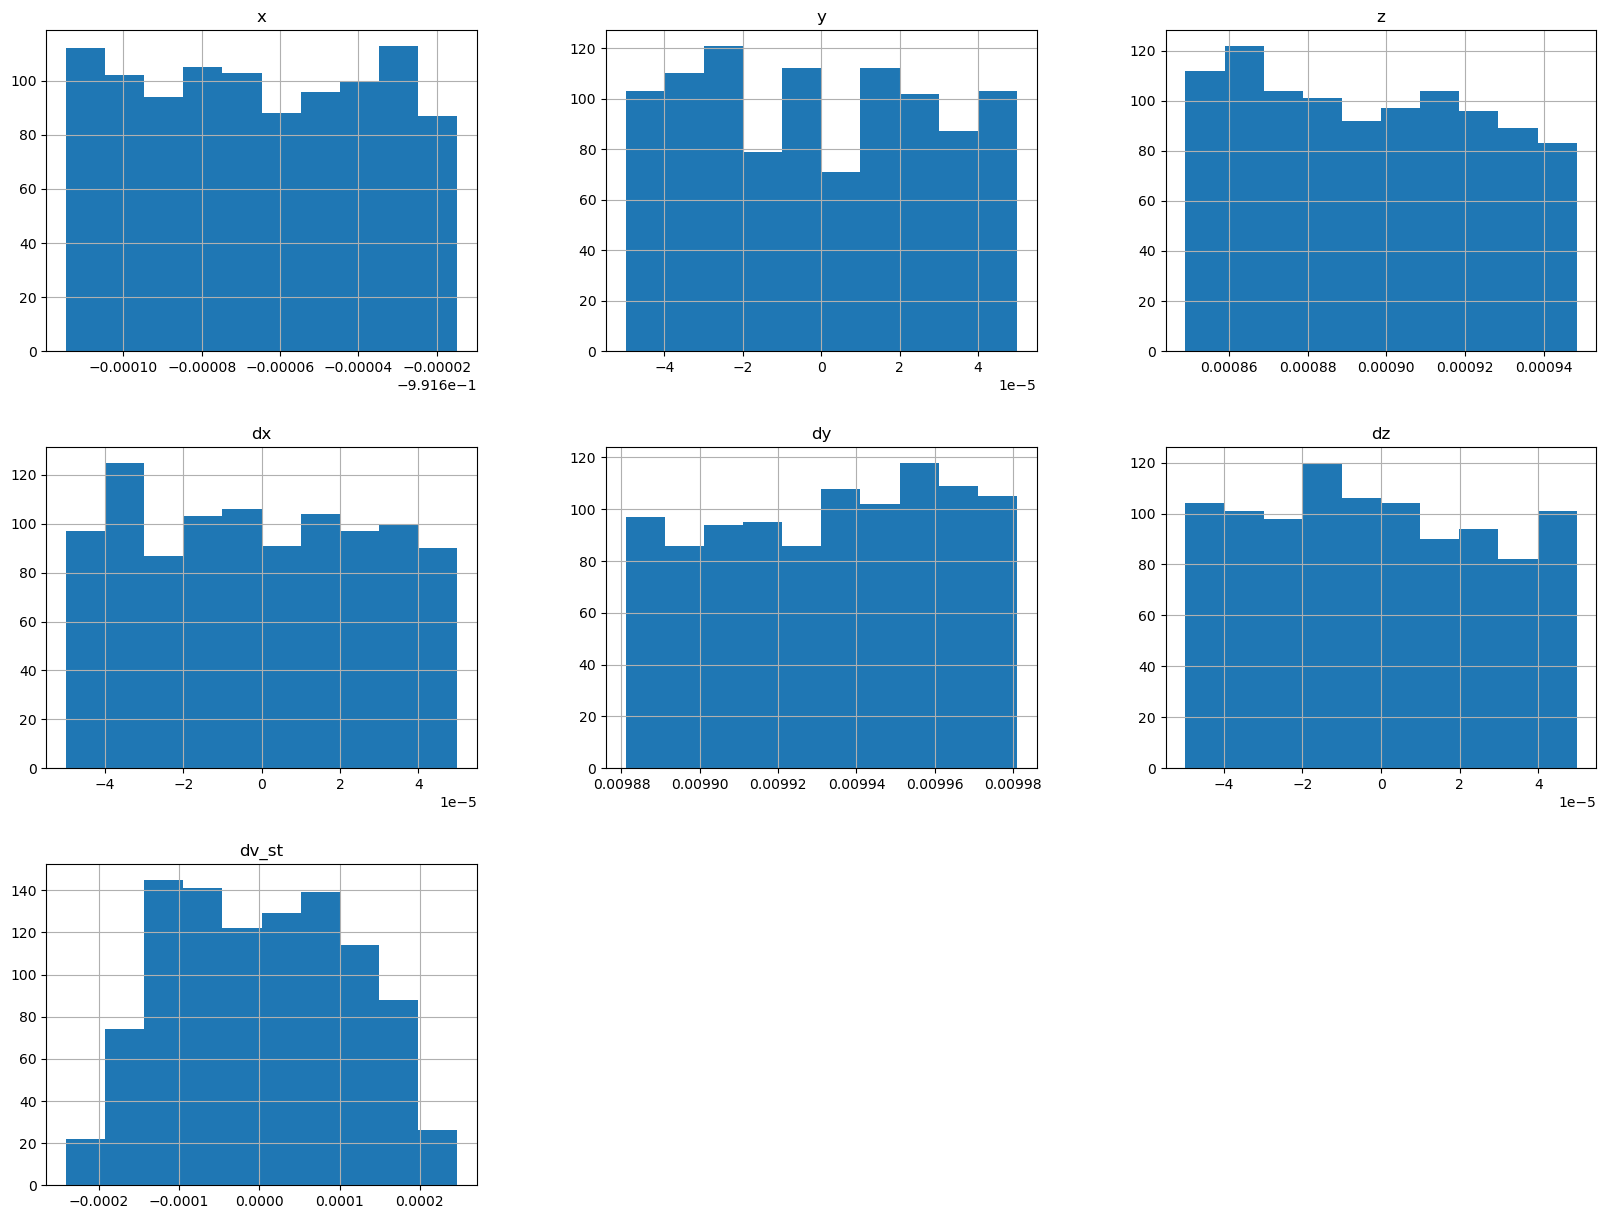

In [81]:
maneuvers.hist(figsize=(20,15))
plt.show()

Histograms of attributes (x,y,z,dx,dy,dz) are tail heavy. We may need to transform to polar coords, or use angle in p.o. as extra attribute.

## Visualizing Data

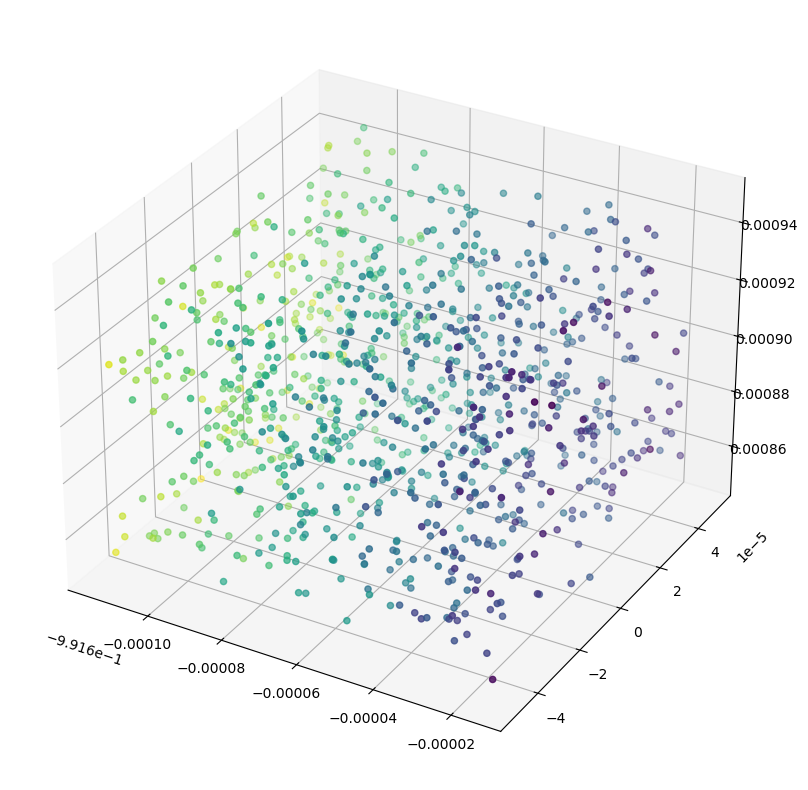

In [82]:
# Visualize shadowing orbit in position space, i.e. the points where correction
# maneuvers are performed.

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(maneuvers['x'], maneuvers['y'], maneuvers['z'], c=maneuvers['dv_st'])
plt.show()

Try adding new attribute "angle" = angle in the periodic orbit, which is essentially time/period.

In [83]:
#maneuvers["angle"]=maneuvers["t"].apply(lambda x: math.fmod(x, 0.3059226605957322E+01))
#maneuvers = maneuvers.drop(["t"], axis=1)
corr_matrix = maneuvers.corr()
corr_matrix["dv_st"].sort_values(ascending=False)

dv_st    1.000000
dz       0.039673
y        0.020568
z       -0.068008
dy      -0.133428
dx      -0.219920
x       -0.960326
Name: dv_st, dtype: float64

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='dx', ylabel='x'>, <Axes: xlabel='dy', ylabel='x'>,
        <Axes: xlabel='dv_st', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='dx', ylabel='y'>, <Axes: xlabel='dy', ylabel='y'>,
        <Axes: xlabel='dv_st', ylabel='y'>],
       [<Axes: xlabel='x', ylabel='dx'>, <Axes: xlabel='y', ylabel='dx'>,
        <Axes: xlabel='dx', ylabel='dx'>,
        <Axes: xlabel='dy', ylabel='dx'>,
        <Axes: xlabel='dv_st', ylabel='dx'>],
       [<Axes: xlabel='x', ylabel='dy'>, <Axes: xlabel='y', ylabel='dy'>,
        <Axes: xlabel='dx', ylabel='dy'>,
        <Axes: xlabel='dy', ylabel='dy'>,
        <Axes: xlabel='dv_st', ylabel='dy'>],
       [<Axes: xlabel='x', ylabel='dv_st'>,
        <Axes: xlabel='y', ylabel='dv_st'>,
        <Axes: xlabel='dx', ylabel='dv_st'>,
        <Axes: xlabel='dy', ylabel='dv_st'>,
        <Axes: xlabel='dv_st', y

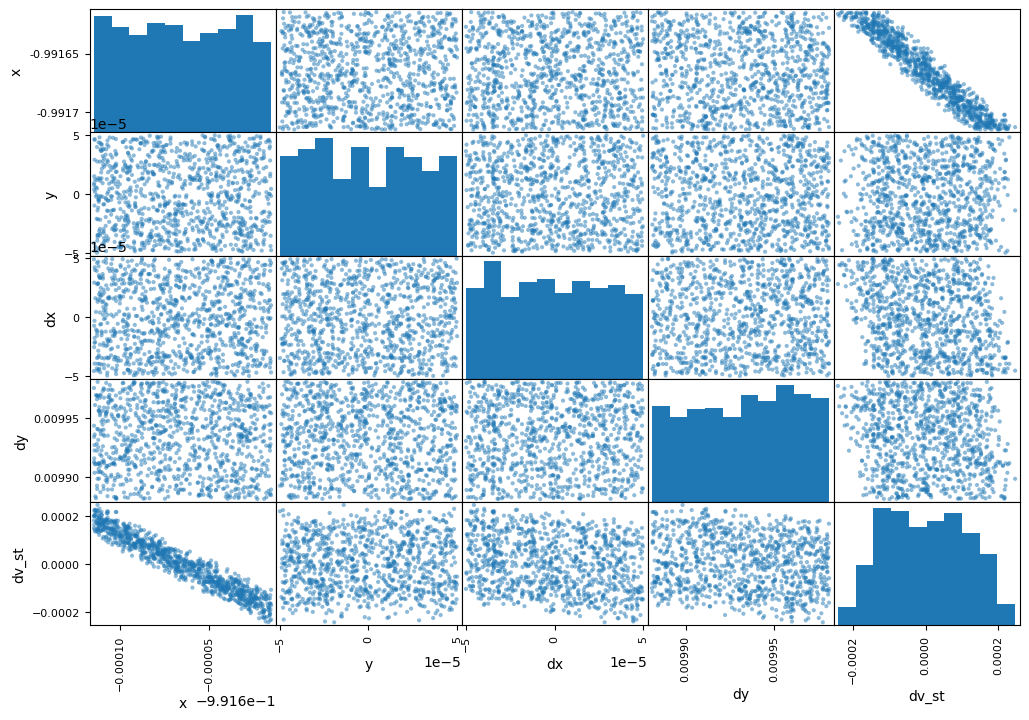

In [84]:
#attributes = ["angle", "x", "dx", "dv_st"]
attributes = ["x", "y", "dx", "dy", "dv_st"]
scatter_matrix(maneuvers[attributes], figsize=(12, 8))

dv_st is either positively or negatively correlated to state variables (x,y,z,dx,dy,dz) !!

Notice that angle and dv_st are not correlated, but they are nonlinearly related ("V" shape) !!

y, dx and dz are perfectly correlated!!!

# Prepare the Data for Machine Learning Algorithms

## Create a Train/Test Set

In [85]:
# Let's separate the predictors and the labels

# Drop dx and dz features, since they are almost proportional to y
#maneuvers_predictors = maneuvers.drop(["dx", "dz", "dv_st"], axis=1)

maneuvers_predictors = maneuvers.drop("dv_st", axis=1)
maneuvers_labels = maneuvers[["dv_st"]].copy()
maneuvers_predictors.head()
#maneuvers_labels.head()

,x,y,z,dx,dy,dz
0,-0.991681,-0.000044,0.000927,0.000040,0.009916,0.000044
1,-0.991656,-0.000020,0.000860,-0.000008,0.009932,-0.000050
2,-0.991688,0.000013,0.000859,0.000048,0.009959,-0.000048
3,-0.991703,0.000025,0.000920,0.000033,0.009915,-0.000008
4,-0.991644,0.000014,0.000850,-0.000005,0.009939,-0.000038


## Create Train/Test/Validation Sets

In [86]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
maneuvers_predictors, maneuvers_labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
X_train.head()

(600, 6)
(200, 6)
(200, 6)


,x,y,z,dx,dy,dz
208,-0.991685,-0.000022,0.000915,-1.357941e-06,0.009960,-0.000002
338,-0.991650,0.000034,0.000856,3.344351e-05,0.009920,-0.000003
92,-0.991653,0.000037,0.000854,-5.827254e-06,0.009885,-0.000014
51,-0.991664,-0.000019,0.000919,1.647200e-05,0.009966,0.000014
611,-0.991643,-0.000047,0.000932,7.537930e-07,0.009898,0.000045


In [87]:
# Scale all the features. This transforms data type from dataframe to numpy array.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[0.29272304, 0.2758347 , 0.66528667, 0.48457202, 0.79405905,
        0.48246417],
       [0.64277091, 0.83624018, 0.06955244, 0.83483992, 0.38904666,
        0.47177623],
       [0.61818384, 0.87098823, 0.05401757, 0.43958949, 0.03523766,
        0.35563099],
       [0.50357367, 0.31424925, 0.70291175, 0.66402594, 0.85442496,
        0.63813887],
       [0.71774051, 0.02491039, 0.83874983, 0.50582609, 0.16310659,
        0.94952361]])

In [88]:
# Try PCA of data
from sklearn.decomposition import PCA
pca_pred = PCA(n_components=2, whiten=True)   # PCA of predictors
principalComponents_pred = pca_pred.fit_transform(X_train_scaled)
print('Explained variability per principal component: {}'.format(pca_pred.explained_variance_ratio_))

# X_train_scaled = pca_pred.transform(X_train_scaled)
# X_valid_scaled = pca_pred.transform(X_valid_scaled)
# X_test_scaled = pca_pred.transform(X_test_scaled)
# X_train_scaled[:5]

Explained variability per principal component: [0.18144631 0.17062687]


In [89]:
# Scale target variable dv_st as well.
# Rationale: dv_st takes very small values (10^{-8}), 
# so MSE may be tiny and not computed properly. Also, NN may converge faster?

scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train)
y_valid_scaled = scaler_target.transform(y_valid)
y_test_scaled = scaler_target.transform(y_test)

<Figure size 640x480 with 0 Axes>

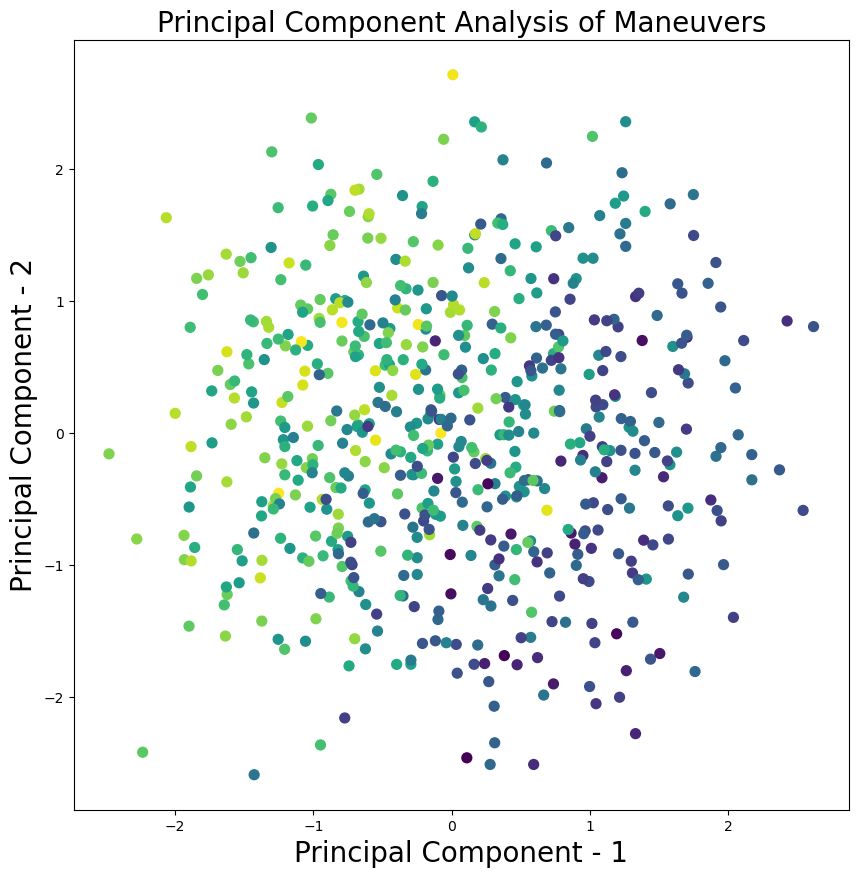

In [90]:
# Plot results of PCA
plt.figure()
plt.figure(figsize=(10,10))
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Maneuvers",fontsize=20)
plt.scatter(principalComponents_pred[:, 0], principalComponents_pred[:, 1], c=y_train_scaled, s = 50)

From the above picture, it is seems that (PC1, PC2) only do not allow to distinguish dv. 

In [91]:
import joblib
joblib.dump(scaler, 'scaler_supervised.gz')
joblib.dump(scaler_target, 'scaler_target_supervised.gz')

['scaler_target_supervised.gz']

# Select and Train a Model

## Training and Evaluating on the Training Set

In [92]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_scaled)
lin_reg.coef_

array([[-0.79826587,  0.02940622, -0.06008364, -0.16597236, -0.14397138,
        -0.00829272]])

In [67]:
# Let's measure this regression model's RMSE on the whole training set
from sklearn.metrics import mean_squared_error
maneuvers_predictions = lin_reg.predict(X_train_scaled)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.00044201896987101376

Clearly not a great score: the SD(dv_st) value is 8.e-7, so a typical prediction error of 6.6.e-7 is not great.

In [68]:
# Let’s train a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = tree_reg.predict(X_train_scaled)
tree_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

NOW THIS IS MUCH BETTER!!

In [69]:
#Let's try it out on 5 instances from the test set
some_data = X_test_scaled[10:20]
some_labels = y_test_scaled[10:20]
print("Predictions:", list(tree_reg.predict(some_data)))
print("Labels:", list(some_labels))

Predictions: [0.7215604049371094, 0.6820188733839174, 0.5578364913780223, 0.5303659135525393, 0.5676010967158642, 0.5279214751299994, 0.7093651141624846, 0.8249240887565659, 0.374620371033109, 0.8781253930925675]
Labels: [array([0.79822573]), array([0.67131925]), array([0.65708543]), array([0.48331238]), array([0.59449767]), array([0.49166787]), array([0.69590463]), array([0.82839964]), array([0.35357846]), array([0.87748978])]


In [70]:
# Let’s train a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train_scaled)

maneuvers_predictions = forest_reg.predict(X_train_scaled)
forest_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.010122465981485385

## Polynomial Regression

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
maneuvers_pred_poly = poly_features.fit_transform(X_train_scaled)
#print(X_train_scaled.head())
print(maneuvers_pred_poly[0])
#poly_features.get_feature_names_out(['x','y','z','dy'])

[1.15847064e-02 4.78076330e-01 1.23606129e-01 3.93617803e-01
 8.86893613e-01 1.89473776e-02 1.34205423e-04 5.53837393e-03
 1.43194072e-03 4.55994669e-03 1.02744021e-02 2.19499807e-04
 2.28556977e-01 5.90931647e-02 1.88179355e-01 4.24002843e-01
 9.05829274e-03 1.52784752e-02 4.86535731e-02 1.09625487e-01
 2.34201201e-03 1.54934975e-01 3.49097115e-01 7.45802514e-03
 7.86580280e-01 1.68043082e-02 3.59003118e-04]


In [72]:
my_lin_reg = LinearRegression()
my_lin_reg.fit(maneuvers_pred_poly, y_train_scaled)
print(my_lin_reg.coef_)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

[[-7.88030930e-01  3.22997023e-02 -5.61641872e-02 -1.63975794e-01
  -1.41245931e-01 -7.51528041e-03  3.00441600e-03  2.07308527e-04
   1.28723995e-03  2.31411152e-04 -4.33582429e-04  1.87446710e-05
  -3.35681830e-03  4.87903894e-05  5.25377785e-04 -9.83978814e-04
   2.60720337e-05 -3.19127522e-03  4.48332669e-05 -8.36101699e-05
  -9.08523972e-04 -7.74517389e-05  2.83469395e-04  8.22080750e-06
  -2.68290124e-04 -1.49819453e-05 -3.00755212e-04]]


2.373936138391739e-06

## SVM Regression

In [73]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2)
svm_poly_reg.fit(X_train_scaled, y_train_scaled)
maneuvers_predictions = svm_poly_reg.predict(X_train_scaled)
svm_mse = mean_squared_error(y_train_scaled, maneuvers_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

/home/pablo/anaconda3/envs/halo/lib/python3.12/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.060329372591294395

## Cross-validation

Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Random Forest model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [74]:
from sklearn.model_selection import cross_val_score
#tree_reg = DecisionTreeRegressor()
#forest_reg = RandomForestRegressor()
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, maneuvers_pred_poly, y_train_scaled,
scoring="neg_root_mean_squared_error", cv=5)
poly_rmse_scores = -scores

In [75]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(poly_rmse_scores)

Scores: [2.21891326e-06 2.52857481e-06 2.56467332e-06 2.57930606e-06
 2.65873781e-06]
Mean: 2.510041052719107e-06
Standard deviation: 1.5165219845338592e-07


## Evaluate Model on Test Set

In [76]:
maneuvers_pred_poly = poly_features.fit_transform(X_test_scaled)
maneuvers_predictions = my_lin_reg.predict(maneuvers_pred_poly)
lin_mse = mean_squared_error(y_test_scaled, maneuvers_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.3577737234495794e-06

## Persist model

In [77]:
# Persist the model for future use (see correction_module.py) without having to retrain.
# Here you can replace pickle with joblib or cloudpickle
from pickle import dump
with open("model_supervised.pkl", "wb") as f:
    dump(my_lin_reg, f, protocol=5)